In [1]:
# Pokemon type classification 
# Part 1
# JM 
# This notebook uses cnn to predict 4 classes of Pokemon based on their color
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px
init_notebook_mode(connected=True)
from google.colab import drive
import re
import os
from shutil import copyfile
from sklearn.model_selection import train_test_split
from shutil import copyfile, copy2
from keras.preprocessing.image import ImageDataGenerator
import keras
from tensorflow.keras.preprocessing import image 
import tensorflow as tf

In [2]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [3]:
%cd /content/drive/My Drive/Pokemon/Pokemon/

/content/drive/My Drive/Pokemon/Pokemon


In [4]:
# read in the dataset
pokemons = pd.read_csv('pokemon-images-and-types/pokemon.csv')
numbers = []
for i in range(1,pokemons.shape[0]+1):
    numbers.append(i)
pokemons['pkn'] = numbers
IMG_DIR = 'pokemon-images-dataset/pokemon'
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(IMG_DIR) if isfile(join(IMG_DIR, f))]

In [5]:
# merge the datasets together
dataframe_img = pd.DataFrame([])
images = []
pokemon_number = []
for img in onlyfiles:
    if not re.search('-', img):
        pkn = img.split('.')
        n = re.sub("[^0-9]", "", pkn[0])
        path = IMG_DIR +'/' +str(img)
        images.append(path)
        pokemon_number.append(n)
dataframe_img['images'] = images
dataframe_img['pkn'] = pokemon_number
dataframe_img['pkn'] = dataframe_img['pkn'].astype(int)
dataframe_img['pkn'] = dataframe_img['pkn'].astype(int)
result = pokemons.merge(dataframe_img, left_on='pkn', right_on='pkn')
result.head()

,Name,Type1,Type2,pkn,images
0,bulbasaur,Grass,Poison,1,pokemon-images-dataset/pokemon/1.png
1,ivysaur,Grass,Poison,2,pokemon-images-dataset/pokemon/2.png
2,venusaur,Grass,Poison,3,pokemon-images-dataset/pokemon/3.png
3,charmander,Fire,NaN,4,pokemon-images-dataset/pokemon/4.png
4,charmeleon,Fire,NaN,5,pokemon-images-dataset/pokemon/5.png


In [6]:
# We will be focusing on water, grass, electric, fire
select = ['Water', 'Fire', 'Grass', 'Electric']
result = result[result['Type1'].isin(select)]

In [7]:
# train, test, validation split

X_train, X_test, y_train, y_test = train_test_split(
    result, result['Type1'],test_size = 0.4, random_state=919)

X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size = 0.5, random_state = 919)

In [8]:
# training set
datagen = image.ImageDataGenerator()
trainDf = pd.DataFrame(X_train) 
trainDf["Type1"] = y_train 
train = datagen.flow_from_dataframe(trainDf, x_col = "images", y_col = "Type1") 

Found 149 validated image filenames belonging to 4 classes.


In [9]:
# test set
testDf = pd.DataFrame(X_test) 
testDf["Type1"] = y_test 
test = datagen.flow_from_dataframe(testDf, x_col = "images", y_col = "Type1") 

Found 50 validated image filenames belonging to 4 classes.


In [10]:
# validation set
valDf = pd.DataFrame(X_val) 
valDf["Type1"] = y_val 
val = datagen.flow_from_dataframe(valDf, x_col = "images", y_col = "Type1") 

Found 50 validated image filenames belonging to 4 classes.


In [12]:
# CNN model for 4 classes
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization, Lambda
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
def cnn_model_4():
    model = Sequential()
    IMAGE_WIDTH = 256
    IMAGE_HEIGHT = 256
    IMAGE_CHANNELS = 3
    model.add(Lambda(lambda x: x, input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
    model.add(Conv2D(32, (2, 2), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (2, 2), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (2, 2), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.25))

    model.add(Conv2D(256, (2, 2), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.25))

    

    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(Dense(4, activation='softmax')) 

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

    model.summary()
    return model
model = cnn_model_4()
model.summary()
history = model.fit(train, epochs=70, validation_data=val)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 255, 255, 32)      416       
_________________________________________________________________
batch_normalization_8 (Batch (None, 255, 255, 32)      128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 85, 85, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 84, 84, 64)        8256      
_________________________________________________________________
batch_normalization_9 (Batch (None, 84, 84, 64)       

In [14]:
predict = model.predict(test)

In [37]:
# plot model performance
import plotly.io as pio
pio.renderers.default = 'colab'
fig = go.Figure()
epochs = []
for i in range(len(history.history['acc'])):
    epochs.append(i)
fig.add_trace(go.Scatter(x=epochs,y=history.history['acc'], mode='lines',name='Training Accuracy'))
fig.add_trace(go.Scatter(x=epochs,y=history.history['val_acc'], mode='lines',name='Validation Accuracy'))

fig.update_layout(
    {
        'plot_bgcolor': 'rgba(0, 0, 0, 0)',
        'paper_bgcolor': 'rgba(0, 0, 0, 0)',
        'width': 500, 
        'height': 400,
        'title': "4-class CNN Model Performance (RGB) "

})
fig.update_xaxes(title_text='Number of Epoches')
fig.update_yaxes(title_text='Accuracy')

fig.show()

In [ ]:
from sklearn.metrics import classification_report
predict_frame = pd.DataFrame([])
predict_frame['category'] = np.argmax(predict, axis=-1)
labels = dict((v,k) for k,v in val.class_indices.items())
predict_frame['category'] = predict_frame['category'].replace(labels)
print(classification_report(y_test, predict_frame['category']))

              precision    recall  f1-score   support

    Electric       0.00      0.00      0.00         5
        Fire       0.30      0.25      0.27        12
       Grass       0.25      0.20      0.22        10
       Water       0.52      0.65      0.58        23

    accuracy                           0.40        50
   macro avg       0.27      0.28      0.27        50
weighted avg       0.36      0.40      0.38        50



In [ ]:
def show_wrong_classification(y_test, predict, result):
    tmp = result[result.index.isin(y_test.index)]
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 20))
    i=0
    for imag, true, pred in zip(tmp['images'], tmp['Type1'], predict):
        if true!=pred:
            if i <3:
                img = Image.open(imag)
                fig = plt.figure()
                ax[i].imshow(img)
                ax[i].set_title(str(pred))
                i+=1

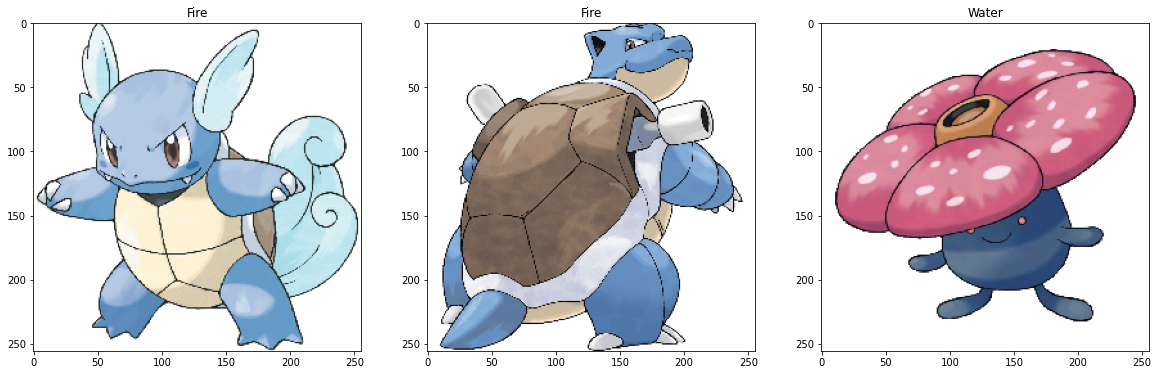

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
from PIL import Image
show_wrong_classification(y_test, predict_frame['category'], result)

  0%|          | 0/4 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

 25%|██▌    

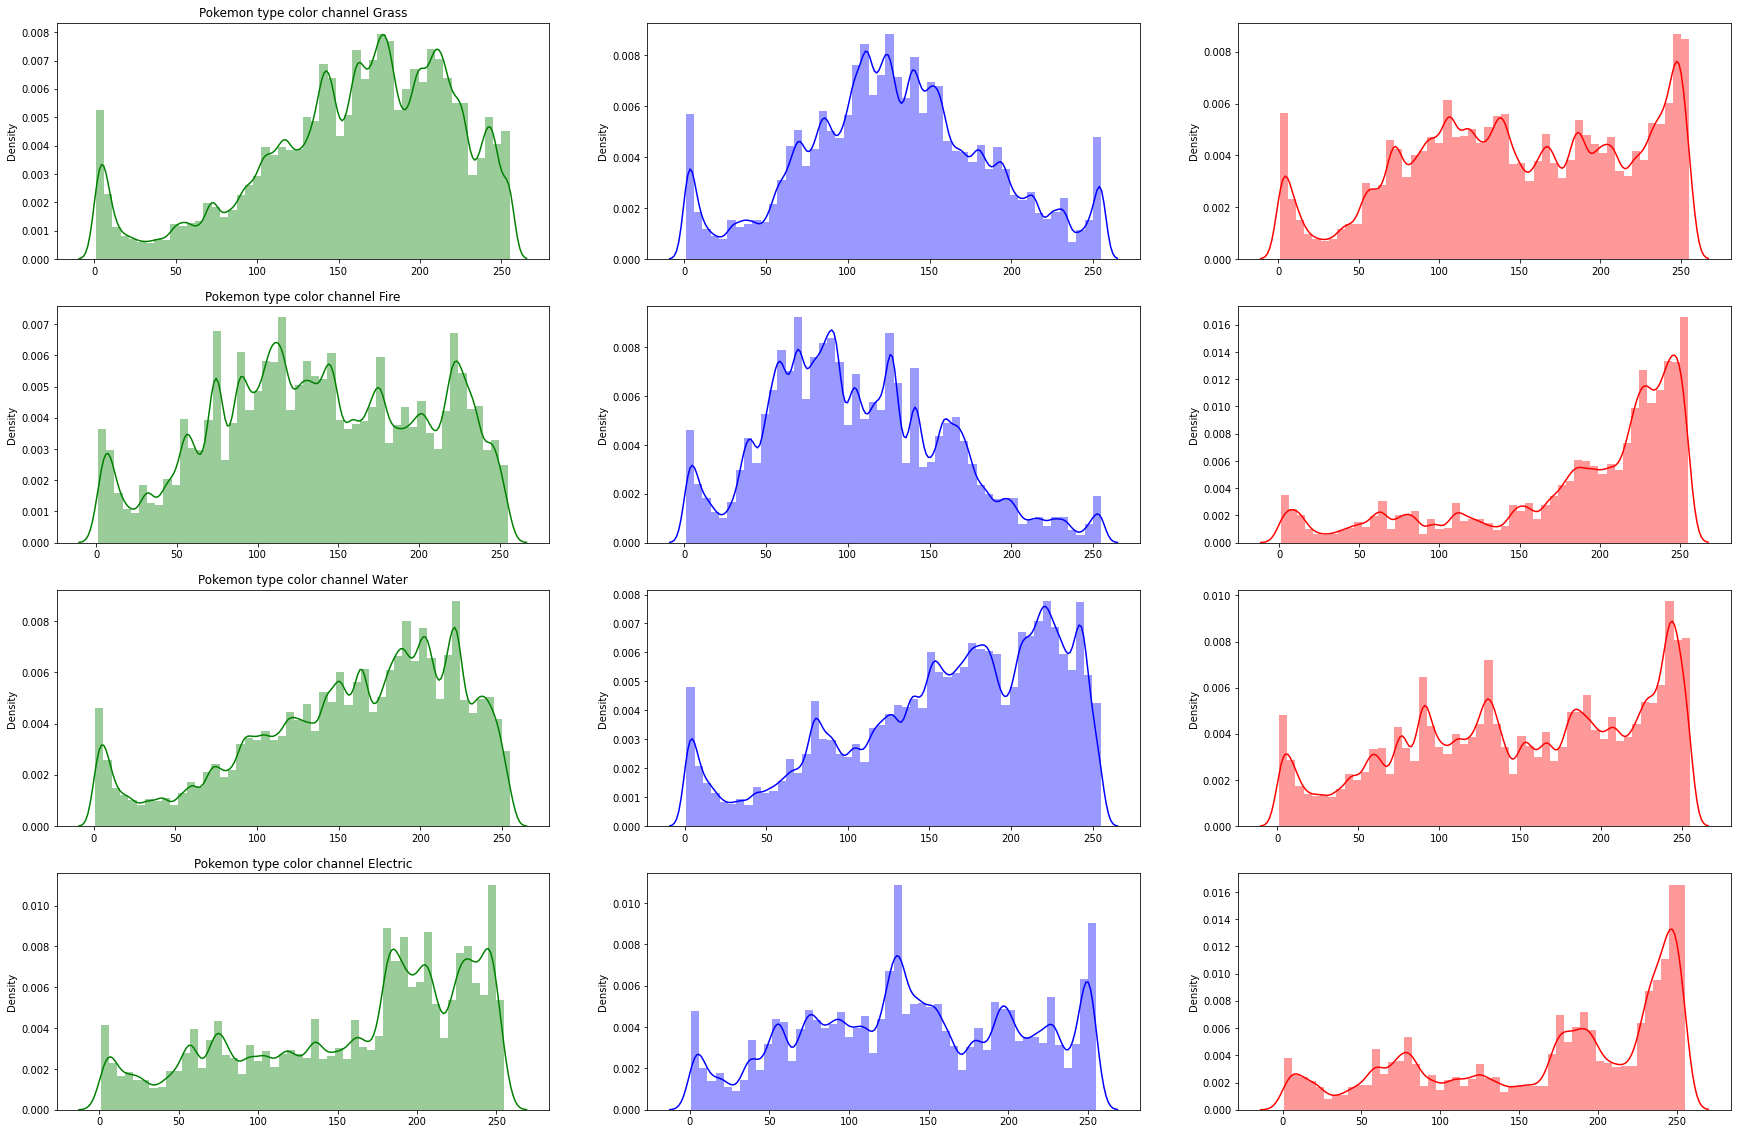

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4,3,figsize=(30,20))
k =0
import cv2
list_b =[]
list_r = []
list_g = []
from tqdm import tqdm
for type_ in tqdm(result['Type1'].unique()):
    tmp = result[result['Type1']==type_]
    for img in tmp['images']:
        img = cv2.imread(img)
        b, g, r = cv2.split(img)
        color = 'blue'
        for i in b:
            for j in i:
                if j != 0:
                    list_b.append(j)
        color = 'green'
        for i in g:
            for j in i:
                if j != 0:
                    list_g.append(j)
        color = 'red'
        for i in r:
            for j in i:
                if j != 0:
                    list_r.append(j)
    sns.distplot(list_g, ax=axes[k, 0], color='g')
    sns.distplot(list_b, ax=axes[k, 1], color='b')
    sns.distplot(list_r, ax=axes[k, 2], color='r')
    axes[k, 0].set_title('Pokemon type color channel ' + type_)
    if type_ =='Fire':
        list_g_f = list_g
        list_b_f = list_b
        list_r_f = list_r
    if type_ =='Grass':
        list_g_g = list_g
        list_b_g = list_b
        list_r_g = list_r
    if type_ =='Electric':
        list_g_e = list_g
        list_b_e = list_b
        list_r_e = list_r
    else:
        list_g_w = list_g
        list_b_w = list_b
        list_r_w = list_r
    list_b =[]
    list_r = []
    list_g = []
    
    k += 1